# Predicción de enfermedades cardíacas mediante el aprendizaje automático

Este cuaderno presenta conceptos básicos de aprendizaje automático y ciencia de datos mediante la exploración del problema de la **clasificación** de las enfermedades cardíacas.

Pretende ser un ejemplo completo de cómo podría ser una **prueba de concepto** de ciencia de datos y aprendizaje automático.

Para trabajar, se usara pandas, Matplotlib y NumPy para el análisis de datos, así como Scikit-Learn para el aprendizaje automático y las tareas de modelado.


## 1. Definición del problema
El problema que exploraremos es la **clasificación binaria** (una muestra solo puede ser una de dos cosas).

Esto se debe a que vamos a utilizar una serie de **características** diferentes sobre una persona para predecir si tiene una enfermedad cardíaca o no.

En una oracion,

> Dados los parámetros clínicos de un paciente, ¿podemos predecir si tiene o no una cardiopatía?


## 2. Datos

Los datos originales provienen de la [base de datos de Cleveland] (https://archive.ics.uci.edu/ml/datasets/heart+Disease) del repositorio de aprendizaje automático de UCI.

Sin embargo, lo hemos descargado de forma formateada desde [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

La base de datos original contiene 76 atributos, pero aquí solo se utilizarán 14 atributos. **Atributos** (también llamados **características**) son las variables que usaremos para predecir nuestra **variable objetivo**.

Los atributos y características también se conocen como **variables independientes** y una variable de destino se puede denominar **variable dependiente**.

> Usamos las variables independientes para predecir nuestra variable dependiente.

O en nuestro caso, las variables independientes son los diferentes atributos médicos de un paciente y la variable dependiente es si tiene o no una enfermedad cardíaca.

## 3. Evaluación

La métrica de evaluación es algo que puede definir al comienzo de un proyecto.

Dado que el aprendizaje automático es muy experimental, podría decir algo como:

> Si podemos alcanzar un 95 % de precisión en la predicción de si un paciente tiene o no una enfermedad cardíaca durante la prueba de concepto, realizaremos este proyecto.

La razón por la que esto es útil es que proporciona un objetivo aproximado para que trabaje un ingeniero de aprendizaje automático o un científico de datos.

Sin embargo, debido a la naturaleza de la experimentación, la métrica de evaluación puede cambiar con el tiempo.

## 4. Características

Aquí es donde obtendrá información diferente sobre cada una de las características de sus datos. Puede hacer esto haciendo su propia investigación (como mirar los enlaces anteriores) o hablando con un experto en la materia (alguien que conoce el conjunto de datos).

**Crear diccionario de datos**

1. edad - edad en años
2. sexo - (1 = masculino; 0 = femenino)
3. cp - tipo de dolor en el pecho
    * 0: Angina típica: dolor torácico relacionado con disminución del suministro de sangre al corazón
    * 1: Angina atípica: dolor torácico no relacionado con el corazón
    * 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
    * 3: Asintomático: dolor torácico sin signos de enfermedad
4. trestbps: presión arterial en reposo (en mm Hg en el momento de la admisión al hospital) cualquier valor por encima de 130-140 suele ser motivo de preocupación
5. chol - colestoral sérico en mg/dl
    * suero = LDL + HDL + .2 * triglicéridos
    * por encima de 200 es motivo de preocupación
6. fbs - (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
    * '>126' mg/dL indica diabetes
7. retecg - resultados electrocardiográficos en reposo
    * 0: Nada a destacar
    * 1: anormalidad de onda ST-T
        * puede variar desde síntomas leves hasta problemas graves
        * señala latidos cardíacos anormales
    * 2: hipertrofia ventricular izquierda posible o definitiva
        * Cámara de bombeo principal del corazón agrandada
8. thalach - frecuencia cardíaca máxima alcanzada
9. exang - angina inducida por el ejercicio (1 = sí; 0 = no)
10. Oldpeak: la depresión del ST inducida por el ejercicio en relación con el reposo observa el estrés del corazón durante el ejercicio. El corazón no saludable se estresará más.
11. pendiente: la pendiente del segmento ST del ejercicio máximo
    * 0: Upsloping: mejor frecuencia cardíaca con ejercicio (poco común)
    * 1: Flatsloping: cambio mínimo (típico corazón sano)
    * 2: Downslopins: signos de corazón no saludable
12. ca - número de vasos principales (0-3) coloreados por fluoroscopia
    * vaso de color significa que el médico puede ver la sangre que pasa
    * cuanto más movimiento de sangre mejor (sin coágulos)
13. thal - resultado de estrés de talio
    * 1,3: normales
    * 6: defecto fijo: solía ser un defecto pero ahora está bien
    * 7: defecto reversible: no hay circulación sanguínea adecuada al hacer ejercicio
14. objetivo - tiene enfermedad o no (1=sí, 0=no) (= el atributo predicho)

## Preparando las herramientas

Pandas, Matplotlib y NumPy para el análisis y la manipulación de datos.

In [ ]:
#pip install seaborn

In [1]:
# Importar todas las herramientas que necesitamos

# EDA regular (análisis exploratorio de datos) y bibliotecas de gráficos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Modelos de Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluaciones de modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Cargar los Datos

In [2]:
df = pd.read_csv("data/heart-disease.csv")

In [3]:
df.shape

(303, 14)

## Exploración de datos.

El objetivo aquí es obtener más información sobre los datos .

1. ¿Qué pregunta(s) está tratando de resolver (o demostrar que está equivocado)?
2. ¿Qué tipo de datos tiene y cómo trata los diferentes tipos?
3. ¿Qué falta en los datos y cómo se maneja?
4. ¿Dónde están los valores atípicos y por qué debería preocuparse por ellos?
5. ¿Cómo puede agregar, cambiar o eliminar funciones para sacar más provecho de sus datos?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# CUANTAS MUESTRAS POSITIVAS (1) Y NEGATIVAS (0) TENEMOS EN EL DF
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
# En formato porcentaje
df["target"].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

Podemos graficar los recuentos de valores de la columna target llamando a la función plot() y diciéndole qué tipo de gráfico nos gustaría, en este caso, la barra es buena.

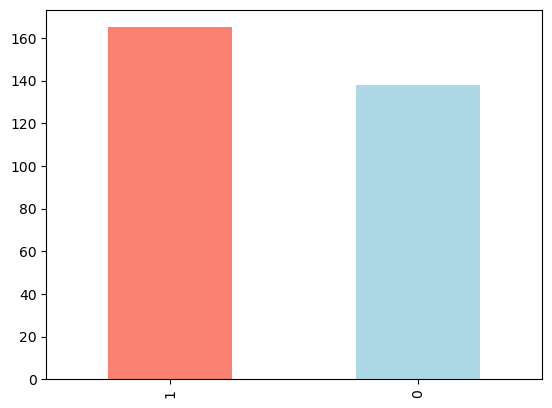

In [8]:
# Grafica los valores en barras
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

`df.info()` muestra una visión rápida de la cantidad de valores faltantes que tiene y con qué tipo de datos está trabajando.

Para este caso, no faltan valores y todas nuestras columnas son de naturaleza numérica.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# ¿Hay valores faltantes?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Otra forma de obtener información rápida sobre su marco de datos es usar `df.describe()` muestra una variedad de métricas diferentes sobre sus columnas numéricas, como la media, el máximo y la desviación estándar.

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Frecuencia de enfermedades cardíacas según sexo

Se compara la columna objetivo con la columna de sexo.

Recuerde de nuestro diccionario de datos, para la columna objetivo, 1 = enfermedad cardíaca presente, 0 = sin enfermedad cardíaca. Y para el sexo, 1 = masculino, 0 = femenino.

In [12]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


¿Qué podemos inferir de esto? 

Dado que hay alrededor de 100 mujeres y 72 de ellas tienen un valor positivo de enfermedad cardíaca presente, podríamos inferir, según esta variable, si la participante es una mujer, hay un 75 % de probabilidad de que tenga una enfermedad cardíaca.

En cuanto a los hombres, hay alrededor de 200 en total y alrededor de la mitad indica la presencia de una enfermedad cardíaca. Así que podríamos predecir, si el participante es hombre, el 50% de las veces tendrá una enfermedad cardíaca.

### Tabulación cruzada
Se puede trazar la tabulación cruzada usando la función `plot()` y pasándole algunos parámetros como `kind` (el tipo de gráfico que desea), `figsize=(longitud, ancho)` y `color=[color_1, color_2]` (los diferentes colores que le gustaría usar).

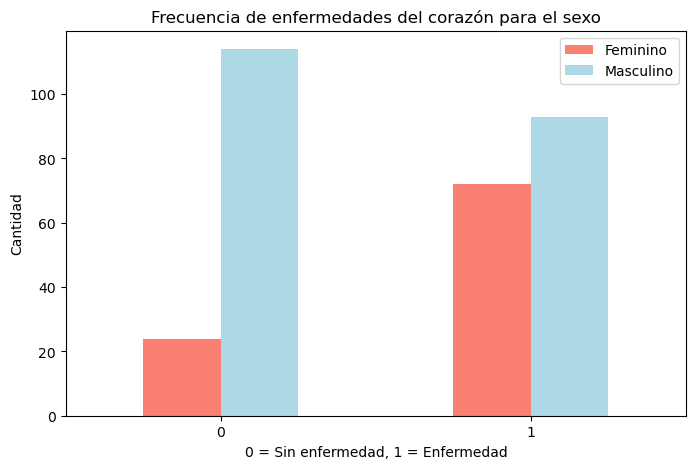

In [14]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                         figsize=(8,5),
                                         color=["salmon","lightblue"])

plt.title("Frecuencia de enfermedades del corazón para el sexo")
plt.xlabel("0 = Sin enfermedad, 1 = Enfermedad")
plt.ylabel("Cantidad")
plt.legend(["Feminino","Masculino"])
plt.xticks(rotation=0);

### Edad v/s a frecuencia cardíaca máxima(thalach ) para enfermedades cardíacas
Intentemos combinar un par de variables independientes, como la edad y el thalach (frecuencia cardíaca máxima) y luego comparémoslas con nuestra enfermedad cardíaca variable objetivo.

Debido a que hay tantos valores diferentes para la edad y el thalach, usaremos un diagrama de dispersión.

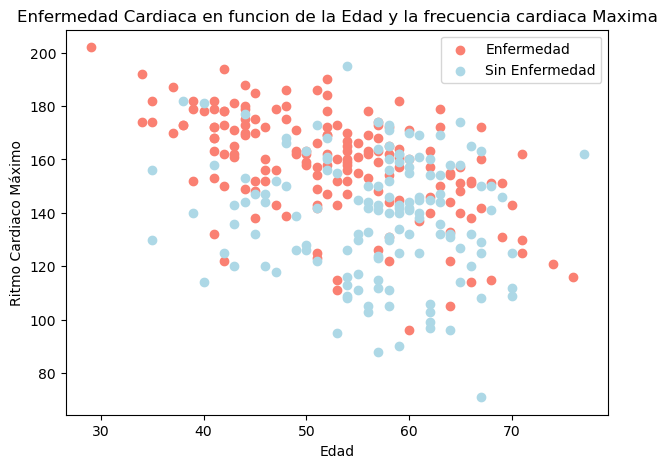

In [15]:
# Creo la Figura
plt.figure(figsize=(7,5))

# Comience con ejemplos positivos
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],
           c="salmon")

# Ahora, para los ejemplos negativos, los queremos en el mismo gráfico, por lo que llamamos plt nuevamente
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],
           c="lightblue");   # eje siempre viene como (x, y)

# Agreguemos información útil
plt.title("Enfermedad Cardiaca en funcion de la Edad y la frecuencia cardiaca Maxima")
plt.xlabel("Edad")
plt.ylabel("Ritmo Cardiaco Máximo")
plt.legend(["Enfermedad", "Sin Enfermedad"]);

¿Qué se puede inferir de esto?

Parece que cuanto más joven es una persona, mayor es su frecuencia cardíaca máxima (los puntos están más arriba a la izquierda del gráfico) y cuanto mayor es una persona, más puntos verdes hay. Pero esto puede deberse a que hay más puntos todos juntos en el lado derecho del gráfico (participantes mayores).

Observación de la **distribución** de edad.

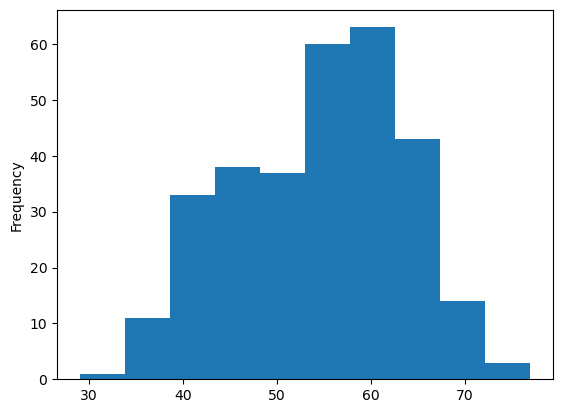

In [16]:
# Los histogramas son una excelente manera de verificar la distribución de una variable
df["age"].plot.hist();

Podemos ver que es una [**distribución normal**](https://en.wikipedia.org/wiki/Normal_distribution) pero ligeramente oscilante hacia la derecha, lo que se refleja en el diagrama de dispersión anterior.

### Frecuencia de enfermedades cardíacas por tipo de dolor torácico

Probemos con otra variable independiente. Esta vez, `cp` (dolor en el pecho).

Usaremos el mismo proceso que hicimos antes con `sex`.

cp - tipo de dolor en el pecho

* 0: Angina típica: dolor torácico relacionado con disminución del suministro de sangre al corazón
* 1: Angina atípica: dolor torácico no relacionado con el corazón
* 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
* 3: Asintomático: dolor torácico sin signos de enfermedad

In [17]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


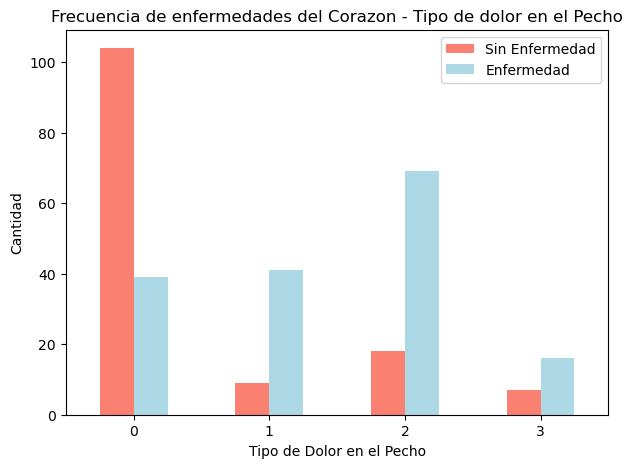

In [18]:
# Hacer crosstab mas Visual
pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                        figsize=(7,5),
                                        color=["salmon", "lightblue"])

plt.title("Frecuencia de enfermedades del Corazon - Tipo de dolor en el Pecho")
plt.xlabel("Tipo de Dolor en el Pecho")
plt.ylabel("Cantidad")
plt.legend(["Sin Enfermedad", "Enfermedad"])
plt.xticks(rotation=0);

¿Qué podemos inferir de esto?

Los diferentes niveles de dolor torácico.

3. cp - tipo de dolor en el pecho
    * 0: Angina típica: dolor torácico relacionado con disminución del suministro de sangre al corazón
    * 1: Angina atípica: dolor torácico no relacionado con el corazón
    * 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
    * 3: Asintomático: dolor torácico sin signos de enfermedad
    
Es interesante que la agina atípica (valor 1) indique que no está relacionada con el corazón, pero parece tener una mayor proporción de participantes con enfermedades cardíacas que no.

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Correlación entre variables independientes

Finalmente, comparamos todas las variables independientes de una sola vez.

¿Por qué?

Se puede dar una idea de qué variables independientes pueden o no tener un impacto en nuestra variable objetivo.

Podemos hacer esto usando `df.corr()` que creará una [**matriz de correlación**](https://www.statisticshowto.datasciencecentral.com/correlation-matrix/) una gran tabla de números que nos dice qué tan relacionada está cada variable con la otra.

In [20]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

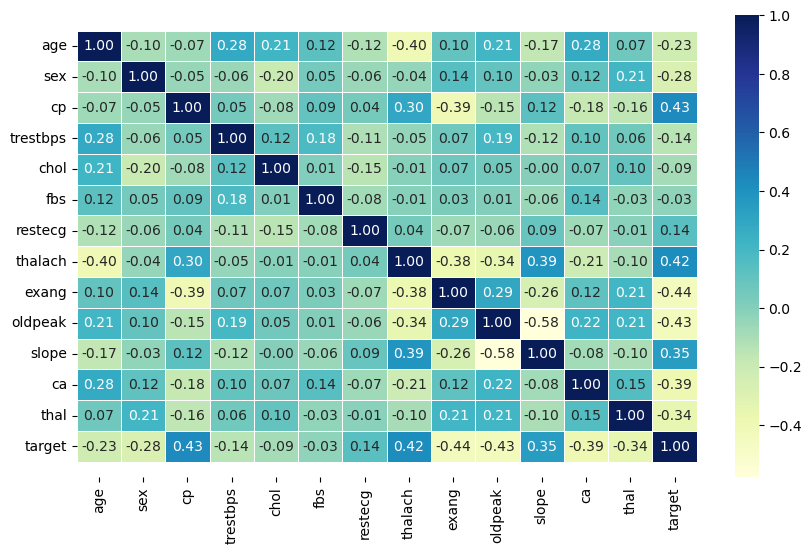

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

# Para que se vea el grafico completo ... la cabecera
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Un valor positivo alto significa una correlación positiva (aumento) y un valor negativo alto significa una correlación negativa (disminución).

## 5. Modelado

Se han explorado los datos, ahora se intentara usar el aprendizaje automático para predecir la variable objetivo en función de las 13 variables independientes.

Antes de construir un modelo, se debe preparar el conjunto de datos.

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Estamos tratando de predecir la variable objetivo usando todas las demás variables.

Para hacer esto, se divide la variable de destino del resto.

In [23]:
X = df.drop("target", axis=1)
y = df["target"]

In [24]:
# VARIABLE INDEPENDIENTE SIN TARGET (ETIQUETA)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
# VARIABLE DEPENDIENTE
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### División de entrenamiento y prueba

Para dividir nuestros datos en un conjunto de prueba y entrenamiento, podemos usar [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de Scikit-Learn y alimentarlo con nuestras variables independientes y dependientes (`X` & `y`).

In [26]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [27]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


Tenemos los datos divididos en conjuntos de prueba y entrenamiento, es hora de construir un modelo de aprendizaje automático.

Vamos a probar 3 modelos diferentes de aprendizaje automático:
1. Regresión logística
2. K-Clasificador de vecinos más cercanos
3. Clasificador de bosque aleatorio

Todos los algoritmos de la biblioteca Scikit-Learn utilizan las mismas funciones, para entrenar un modelo, `model.fit(X_train, y_train)` y para puntuar un modelo `model.score(X_test, y_test)`. `score()` devuelve la proporción de predicciones correctas (1.0 = 100% correcto).

Dado que los algoritmos que hemos elegido implementan los mismos métodos para ajustarlos a los datos y evaluarlos, pongámoslos en un diccionario y creemos uno que los ajuste y los puntúe.

In [28]:
# Poner los modelos en un diccionario
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000), 
          "Random Forest": RandomForestClassifier()}

# Crear función para entrenar y puntuar modelos
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
      Ajusta y evalúa modelos de aprendizaje automático dados.
     models: un diccionario de diferentes modelos de aprendizaje automático de Scikit-Learn
     X_train: datos de entrenamiento
     X_test: prueba de datos
     y_train: etiquetas asociadas con datos de entrenamiento
     y_test: etiquetas asociadas con datos de prueba
    """
   
    np.random.seed(42)
   # Craemos un diccionario con las puntuaciones de los modelos
    model_scores = {}
    
    # Recorrimos los modelos
    for name, model in models.items():
         #Entrenamo el modelo
        model.fit(X_train, y_train)
         # Evaluar el modelo y agregar su puntaje a model_scores 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Comparación de modelos

Dado que hemos guardado las puntuaciones de nuestros modelos en un diccionario, podemos trazarlas convirtiéndolas primero en un DataFrame.

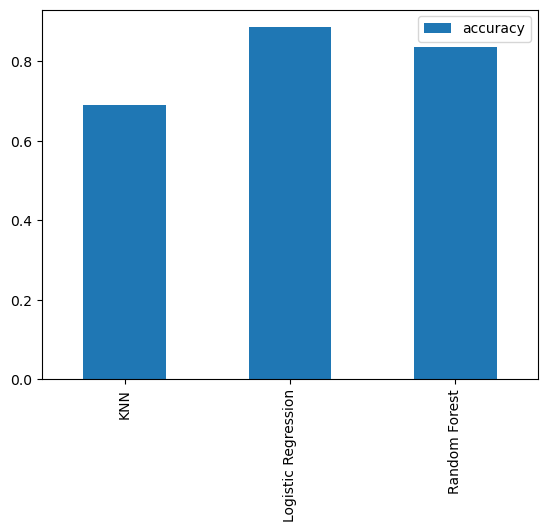

In [30]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Ya se ha encontrado el mejor modelo. Logistic Regression

Ahora tenemos un modelo de referencia... y sabemos que las primeras predicciones de un modelo no siempre son lo que deberíamos basar en nuestros próximos pasos. ¿Qué debemos hacer?

Veamos lo siguiente:

- Ajuste de hiperparámetros
- Importancia de la característica
- Matriz de confusión
- Validación cruzada
- Precisión
- Recuerdo
- Puntuación F1
- Informe de clasificación
- curva ROC
- Área bajo la curva (AUC)

Repasemos algunos conceptos.

* **Ajuste de hiperparámetros**: cada modelo que usa tiene una serie de diales, manillas(configuración) que puede girar para dictar cómo funcionan. Cambiar estos valores puede aumentar o disminuir el rendimiento del modelo.
* **Importancia de las funciones**: si hay una gran cantidad de funciones que estamos usando para hacer predicciones, ¿algunas tienen más importancia que otras? Por ejemplo, para predecir enfermedades del corazón, ¿qué es más importante, el sexo o la edad?
* [**Matriz de confusión**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compara los valores pronosticados con los valores reales de forma tabular, si es 100% correcto, todos los valores en la matriz estarán de arriba a la izquierda a abajo a la derecha (línea de diagnóstico).
* [**Validación cruzada**](https://scikit-learn.org/stable/modules/cross_validation.html): divide su conjunto de datos en varias partes y entrena y prueba su modelo en cada parte y evalúa el rendimiento como un promedio.
* [**Precisión**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score): proporción de verdaderos positivos sobre el número total de muestras. Una mayor precisión conduce a menos falsos positivos.
* [**Recordar**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score): proporción de verdaderos positivos sobre el número total de verdaderos positivos y falsos negativos. Un mayor recuerdo conduce a menos falsos negativos.
* [**Puntuación F1**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score): combina precisión y recuperación en una métrica. 1 es mejor, 0 es peor.
* [**Informe de clasificación**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn tiene una función integrada llamada `classification_report()` que devuelve algunas de las principales métricas de clasificación como precisión, recuperación y puntuación f1.
* [**Curva ROC**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Características operativas del receptor](https://en.wikipedia.org /wiki/Receiver_operating_characteristic) es un gráfico de la tasa de verdaderos positivos frente a la tasa de falsos positivos.
* [**Área bajo la curva (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html): el área debajo de la curva ROC. Un modelo perfecto logra una puntuación de 1,0.
Más información sobre este texto de origenPara obtener más información sobre la traducción, se necesita el texto de origen
Enviar comentarios
Paneles laterales

## Ajuste de hiperparámetros y validación cruzada
Hay que tener cuidado cuando cambias la configuración y funciona tan bien que **sobreajusta** (lo hace demasiado bien) los datos.


Para probar diferentes hiperparámetros, podría usar un **conjunto de validación**, pero dado que no tenemos muchos datos, usaremos la **validación cruzada**.

El tipo más común de validación cruzada es *k-fold*. Implica dividir sus datos en *k-fold's* y luego probar un modelo en cada uno. Por ejemplo, digamos que tenemos 5 divisiones (k = 5). Esto es lo que podría parecer.

| <img src="images/sklearn-cross-validation.png" width=500/> |
Usaremos esta configuración para ajustar los hiperparámetros de algunos de nuestros modelos y luego evaluarlos. También obtendremos algunas métricas más como **precisión**, **recuperación**, **F1-score** y **ROC** al mismo tiempo.

Esto es lo que se hara:
1. Ajuste los hiperparámetros del modelo, vea cuál funciona mejor
2. Realizar validación cruzada
3. Trazar curvas ROC
4. Haz una matriz de confusión
5. Obtenga métricas de precisión, recuperación y puntuación F1
6. Encuentra las características más importantes del modelo

### Ajustar KNeighborsClassifier (KNN) a mano

Hay un hiperparámetro principal para ajustar el algoritmo K-Nearest Neighbors (KNN). El valor predeterminado es 5 (`n_neigbors=5`).

Se probaran algunos valores diferentes de `n_neighbors`.

In [31]:
# Crear una lista de puntajes de train
train_scores = []

# Crear una lista de puntajes de test
test_scores = []

# Crea una lista de diferentes valores para n_neighbors(n_vecinos)
neighbors = range(1,21)

# Intanciamos el algoritmo.
knn = KNeighborsClassifier()

# Bucle a través de diferentes valores para n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Entrenamos el algoritmo
    knn.fit(X_train, y_train)
    
    # Actualizar los puntajes de train
    train_scores.append(knn.score(X_train, y_train))
    
    # Actualizamos los puntajes de test
    test_scores.append(knn.score(X_test, y_test))
    

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Puntaje máximo de KNN en los datos de prueba: 75.41%


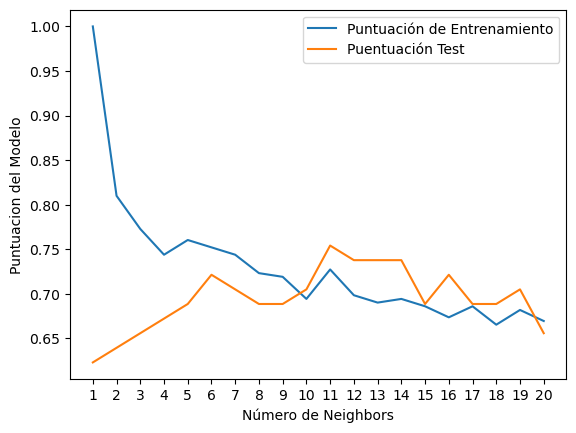

In [34]:
# Graficamos los resultados
plt.plot(neighbors, train_scores, label="Puntuación de Entrenamiento")
plt.plot(neighbors, test_scores, label="Puentuación Test")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Número de Neighbors")
plt.ylabel("Puntuacion del Modelo")
plt.legend()

print(f"Puntaje máximo de KNN en los datos de prueba: {max(test_scores)*100:.2f}%")

Mirando el gráfico, `n_neighbors = 11` parece lo mejor.

Incluso sabiendo esto, el rendimiento del modelo `KNN` no se acercó a lo que hicieron `LogisticRegression` o `RandomForestClassifier`.

Debido a esto, se descarta `KNN` y nos centraremos en los otros dos.

Hemos ajustado `KNN` a mano, pero veamos cómo podemos `LogisticsRegression` y `RandomForestClassifier` usando [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV .html).

En lugar de que tengamos que probar manualmente diferentes hiperparámetros, `RandomizedSearchCV` prueba varias combinaciones diferentes, las evalúa y guarda la mejor.

### Ajuste de modelos con [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Al leer la documentación de Scikit-Learn para [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), encontramos que hay una serie de diferentes hiperparámetros que podemos sintonizar.

Lo mismo para [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Vamos a crear una cuadrícula de hiperparámetros (un diccionario de diferentes hiperparámetros) para cada uno y luego probarlos.

In [35]:
# Crear una grilla de hiperparámetros para LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Crear una grilla de hiperparámetros para RandomForestClassifier - Diferentes hiperparámetros de RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Ahora usemos `RandomizedSearchCV` para probar y ajustar nuestro modelo `LogisticRegression`.

Le pasaremos los diferentes hiperparámetros de `log_reg_grid` y estableceremos `n_iter = 20`. Esto significa que `RandomizedSearchCV` probará 20 combinaciones diferentes de hiperparámetros de `log_reg_grid` y guardará las mejores.

In [36]:
np.random.seed(42)

# Configurar la búsqueda aleatoria de hiperparámetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Ajustar el modelo de búsqueda de hiperparámetros aleatorios
rs_log_reg.fit(X_train, y_train)
#Ajuste de 5 modelos para cada uno de los 20 candidatos, totalizando 100 ajustes.(SALIDA)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
# VERIFICAR LOS MEJORES RESULTADOS DE PARAMETROS
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Ahora que hemos ajustado `LogisticRegression` usando `RandomizedSearchCV`, haremos lo mismo para `RandomForestClassifier`.

In [39]:
np.random.seed(42)

# Configurar la búsqueda aleatoria de hiperparámetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Ajustar el modelo de búsqueda de hiperparámetros aleatorios para RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
# VERIFICAR LOS MEJORES RESULTADOS DE PARAMETROS
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
# Evaluar el modelo de bosque aleatorio
rs_rf.score(X_test, y_test)

0.8688524590163934

In [42]:
# Mostramos los resultados sin afinar los hiperparametros para comparar
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

¡Excelente! El ajuste de los hiperparámetros para cada modelo vio un ligero aumento de rendimiento tanto en `RandomForestClassifier` como en `LogisticRegression`.

Pero dado que `LogisticRegression` está al frente, intentaremos ajustarlo aún más con [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

### Ajuste de un modelo con [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

La diferencia entre `RandomizedSearchCV` y `GridSearchCV` es que `RandomizedSearchCV` busca en una cuadrícula de hiperparámetros realizando combinaciones `n_iter`, `GridSearchCV` probará todas las combinaciones posibles.

En breve:
* `RandomizedSearchCV`: prueba combinaciones `n_iter` de hiperparámetros y guarda las mejores.
* `GridSearchCV`: prueba todas las combinaciones de hiperparámetros y guarda las mejores.

Veámoslo en acción.

## Ajuste de hiperparámetros con GridSearchCV
Dado que nuestro modelo de regresión logística proporciona las mejores puntuaciones hasta el momento, intentaremos mejorarlas de nuevo utilizando GridSearchCV...

In [43]:
# Diferentes hiperparámetros para nuestro modelo LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Configurar la búsqueda de hiperparámetros de cuadrícula para LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
# VERIFICAR LOS MEJORES RESULTADOS DE PARAMETROS
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
# Evaluamos el Modelo
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
model_scores

En este caso, se obtienen los mismos resultados que antes, ya que nuestra cuadrícula solo tiene un máximo de 20 combinaciones de hiperparámetros diferentes.

**Nota:** Si hay una gran cantidad de combinaciones de hiperparámetros en su cuadrícula, `GridSearchCV` puede tomar mucho tiempo para probarlas todas. Por eso es una buena idea comenzar con `RandomizedSearchCV`, probar una cierta cantidad de combinaciones y luego usar `GridSearchCV` para refinarlas.

## Evaluar un modelo de clasificación, más allá de la precisión(Accuracy)

Ahora que tenemos un modelo ajustado, veamos algunas de las métricas que discutimos antes.

* Curva ROC y puntaje AUC - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Matriz de confusión - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Informe de clasificación - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precisión - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recuperación - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* Puntuación F1 - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Afortunadamente, Scikit-Learn tiene todo esto integrado.

... y sería genial si se utilizara la validación cruzada siempre que sea posible.

Para acceder a ellos, tendremos que usar nuestro modelo para hacer predicciones en el conjunto de prueba. Puede hacer predicciones llamando a `predict()` en un modelo entrenado y pasándole los datos que le gustaría predecir.

Para hacer comparaciones y evaluar nuestro modelo entrenado, primero debemos hacer predicciones sobre los datos de prueba.

In [46]:
# Hacer predicciones sobre datos de prueba
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Se parecen a nuestras etiquetas de datos de prueba originales, excepto que son diferentes donde el modelo ha predicho mal.

In [47]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

Como tenemos nuestros valores de predicción, podemos encontrar las métricas que queremos.

Comencemos con la curva ROC y las puntuaciones AUC.

### Curva ROC y puntajes AUC

Es una forma de comprender el rendimiento de su modelo al comparar la tasa de verdaderos positivos con la tasa de falsos positivos.

En nuestro caso...

> Para obtener un ejemplo apropiado en un problema del mundo real, considere una prueba de diagnóstico que busca determinar si una persona tiene una determinada enfermedad. Un falso positivo en este caso ocurre cuando la persona da positivo, pero en realidad no tiene la enfermedad. Un falso negativo, por otro lado, ocurre cuando la persona da negativo, lo que sugiere que está sana, cuando en realidad tiene la enfermedad.

- Verdadero positivo = el modelo predice 1 cuando la verdad es 1.
- Falso positivo = el modelo predice 1 cuando la verdad es 0.
- Verdadero negativo = el modelo predice 0 cuando la verdad es 0
- Falso negativo = el modelo predice 0 cuando la verdad es 1

Se usa la versión GridSearchCV de nuestro estimador `LogisticRegression`, `gs_log_reg`, así como los datos de prueba, `X_test` y `y_test`.

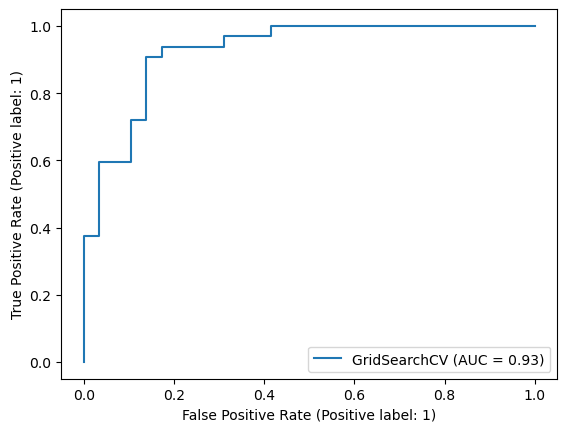

In [48]:
# método from_estimator,
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

# Mostrar la visualización
plt.show()


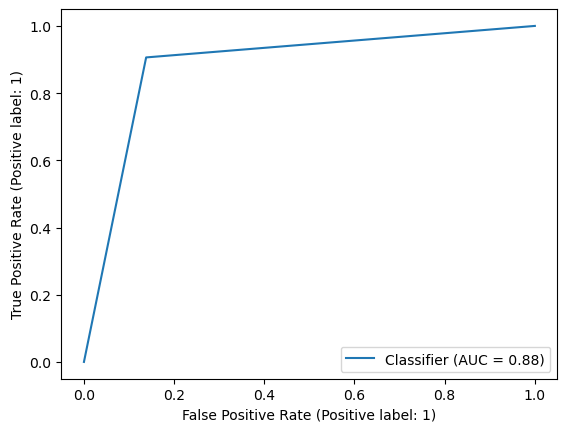

In [49]:
# método from_predictions
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Obtener las predicciones del modelo
y_pred = gs_log_reg.predict(X_test)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay.from_predictions(y_test, y_pred)

# Mostrar la visualización
plt.show()


In [ ]:
# Graficar la curva ROC y calcular y calcular la métrica AUC
# plot_roc_curve(gs_log_reg, X_test, y_test)

Siguiente metrica de evaluación, matriz de confusión.

### Matriz de confusión

Una matriz de confusión es una forma visual de mostrar dónde su modelo hizo las predicciones correctas y dónde hizo las predicciones incorrectas (o, en otras palabras, se confundió).

Scikit-Learn nos permite crear una matriz de confusión usando [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) y pasándole las etiquetas verdaderas y etiquetas previstas.

In [50]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


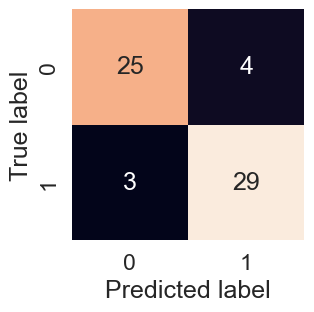

In [51]:
#  PODEMOS MEJORAR LA VISUALIZACION DE LA MATRIZ DE CONFUSION CON Seaborn
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [ ]:
### ¿ ES PEOR UN FALSO NEGATIVO O UN FALSO POSITIVO?

El modelo se confunde (predice la etiqueta incorrecta) relativamente igual en ambas clases. En esencia, hay 4 ocasiones en las que el modelo predijo 0 (NO TIENE ENFERMEDAD)cuando debería haber sido 1 (falso negativo) y 3 ocasiones en las que el modelo predijo 1(TIENE ENFERMEDAD) en lugar de 0 (falso positivo).

### Informe de clasificación

Podemos hacer un informe de clasificación usando [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) y pasarle las etiquetas verdaderas, así como nuestros modelos. etiquetas previstas.

Un informe de clasificación también nos dará información de la precisión y recuperación de nuestro modelo para cada clase.

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



¿Que está pasando aqui?

* **Precisión**: indica la proporción de identificaciones positivas (clase 1 predicha por el modelo) que en realidad fueron correctas. Un modelo que no produce falsos positivos tiene una precisión de 1,0.
* **Recall**: indica la proporción de positivos reales que se clasificaron correctamente. Un modelo que no produce falsos negativos tiene un recuerdo de 1,0.
* **Puntuación F1**: una combinación de precisión y recuperación. Un modelo perfecto logra una puntuación F1 de 1,0.
* **Soporte**: la cantidad de muestras en las que se calculó cada métrica.
* **Accuracy(Precisión)**: la precisión del modelo en formato decimal. La precisión perfecta es igual a 1.0.
* **Macro avg**: abreviatura de macro promedio, la precisión promedio, la recuperación y la puntuación F1 entre clases. Macro avg no convierte el desequilibrio de clase en esfuerzo, por lo que si tiene desequilibrios de clase, preste atención a esta métrica.
* **Promedio ponderado**: abreviatura de promedio ponderado, la precisión del promedio ponderado, recuperación y puntaje F1 entre clases. Ponderado significa que cada métrica se calcula con respecto a cuántas muestras hay en cada clase. Esta métrica favorecerá a la clase mayoritaria (por ejemplo, dará un valor alto cuando una clase supere a otra debido a que tiene más muestras).

Ahora se tienen algunas ideas más profundas sobre el modelo. Pero todos estos se calcularon utilizando un solo conjunto de entrenamiento y prueba.

Lo que haremos para hacerlos más sólidos es calcularlos mediante validación cruzada.

¿Cómo?

Tomaremos el mejor modelo junto con los mejores hiperparámetros y usaremos [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) junto con varios ` valores del parámetro de puntuación.

`cross_val_score()` funciona tomando un estimador (modelo de aprendizaje automático) junto con datos y etiquetas. Luego evalúa el modelo de aprendizaje automático en los datos y las etiquetas mediante la validación cruzada y un parámetro de "puntuación" definido.

Recordemos los mejores hiperparámetros y luego verlos en acción.
Más información sobre este texto de origenPara obtener más información sobre la traducción, se necesita el texto de origen
Enviar comentarios
Paneles laterales

### Calcular métricas de evaluación usando validación cruzada

Vamos a calcular la exactitud, la precisión, la recuperación y la puntuación f1 de nuestro modelo mediante la validación cruzada y, para hacerlo, utilizaremos `cross_val_score()`.

In [53]:
# Comprobar los mejores hiperparámetros
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# Crea un nuevo clasificador con los mejores parámetros
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [57]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [58]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [59]:
# Cross-Validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [60]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [61]:
# Cross-Validated f1-score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [62]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [63]:
# VISUALIZAR METRICAS CROSS-VALIDATED
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1-Score": cv_f1},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1-Score
0,0.844699,0.820794,0.921212,0.867301


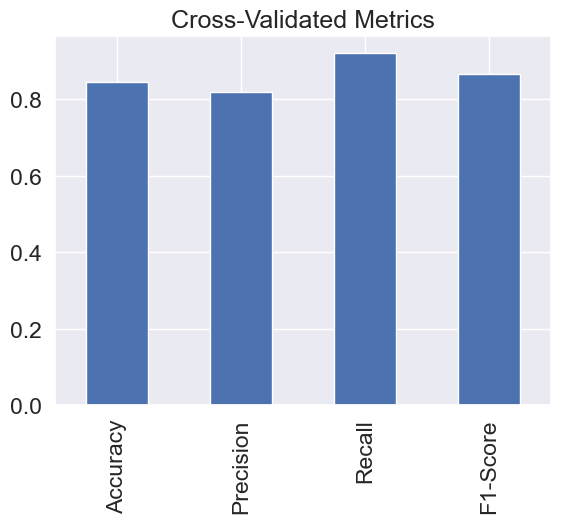

In [64]:
cv_metrics.T.plot.bar(title="Cross-Validated Metrics",
                     legend=False);

¿Ahora que?

Lo último que debe marcar en la lista de nuestras técnicas de evaluación de modelos es la importancia de las características.

## Importancia de las caractericticas

La importancia de las características es preguntar "¿qué características contribuyen más a los resultados del modelo?"

¿Qué características contribuyen más a un modelo que predice si alguien tiene una enfermedad del corazón o no?

A diferencia de algunas de las otras funciones que hemos visto, porque la forma en que cada modelo encuentra patrones en los datos es ligeramente diferente, la forma en que un modelo juzga la importancia de esos patrones también es diferente. Esto significa que para cada modelo, hay una forma ligeramente diferente de encontrar qué funciones son las más importantes.

Se esta usando `LogisticRegression`, veremos una forma en que podemos calcular la importancia de las características para ello.

Para hacerlo, usaremos el atributo `coef_`. Mirando la [documentación de Scikit-Learn para `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), el atributo `coef_` es el coeficiente de las características en la función de decisión.

Podemos acceder al atributo `coef_` después de haber ajustado una instancia de `LogisticRegression`.

In [65]:
### AJUSTAR E INSTANCIAR LogisticRegression ###
#gs_log_reg.best_params_
#{'C': 0.20433597178569418, 'solver': 'liblinear'}


clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [66]:
# Chequear coef_
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
# Coincidencia de coeficientes con las características de las columnas

# Creamos un diccionario
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

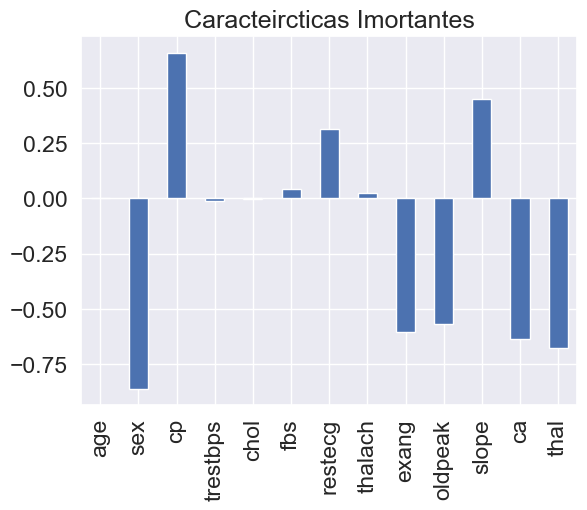

In [69]:
# graficar las caracteriticas importantes
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Caracteircticas Imortantes", legend=False);

Notarás que algunos son negativos y otros positivos.

Cuanto mayor sea el valor (barra más grande), más contribuye la característica a la decisión del modelo.

Si el valor es negativo, significa que hay una correlación negativa. Y viceversa para valores positivos.

Por ejemplo, el atributo 'sexo' tiene un valor negativo de -0,904, lo que significa que a medida que aumenta el valor de 'sexo', el valor de 'objetivo' disminuye.

Podemos ver esto comparando la columna `sexo` con la columna `objetivo`.

In [ ]:
pd.crosstab(df["sex"], df["target"])

Cuando `sexo` es 0 (femenino), hay casi 3 veces más (72 vs. 24) personas con enfermedad cardíaca (`objetivo` = 1) que sin ella.

Y luego, a medida que el 'sexo' aumenta a 1 (masculino), la proporción se reduce a casi 1 a 1 (114 frente a 93) de personas que tienen enfermedades del corazón y las que no.

¿Qué significa esto?

Significa que el modelo ha encontrado un patrón que refleja los datos. Mirando estas cifras y este conjunto de datos específico, parece que si el paciente es mujer, es más probable que tenga una enfermedad cardíaca.

¿Qué tal una correlación positiva?

In [70]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Mirando hacia atrás en el diccionario de datos, vemos que `slope` es la "pendiente del segmento ST de ejercicio máximo" donde:
* 0: Upsloping: mejor frecuencia cardíaca con ejercicio (poco común)
* 1: Flatsloping: cambio mínimo (típico corazón sano)
* 2: Downslopins: signos de corazón no saludable
    
Según el modelo, hay una correlación positiva de 0,470, no tan fuerte como "sexo" y "objetivo", pero aún más de 0.

Esta correlación positiva significa que nuestro modelo está recogiendo el patrón de que a medida que aumenta la 'slope', también lo hace el valor 'objetivo'.

¿Es esto cierto?

Cuando miras el contraste (`pd.crosstab(df["slope"], df["target"]`) lo es. A medida que `slope` sube, también lo hace `target`.

## 6. Experimentación

Se han completado todas las métricas. Debería poder armar un excelente informe que contenga una matriz de confusión, un puñado de métricas validadas cruzadas, como precisión, recall y F1, así como también qué características contribuyen más a la toma de decisiones del modelo.

Pero después de todo esto, es posible que se pregunte dónde está el paso 6 en el marco, la experimentación.

Bueno, el secreto aquí es, como habrás adivinado, que todo es experimentación.

Desde probar diferentes modelos hasta ajustar diferentes modelos y descubrir qué hiperparámetros eran los mejores.

Lo que hemos trabajado hasta ahora ha sido una serie de experimentos.
